In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates

In [2]:
niners_clean_df = pd.read_csv('niners_clean.csv', header=0, index_col=0)
niners_clean_df

,Date,Time,Count,Onoff,Route,Stop
0,7/1/2018,0:00:19,5,on,Silver,CRI Deck
1,7/1/2018,0:07:27,3,off,Silver,Martin Hall
2,7/1/2018,0:09:19,1,off,Silver,Lot 5A
3,7/1/2018,0:13:31,1,off,Green,Cone Deck W
4,7/1/2018,0:16:05,1,on,Green,Cone Deck W
...,...,...,...,...,...,...
505195,6/30/2019,23:41:39,1,on,Silver,East Deck 2
505196,6/30/2019,23:44:25,1,on,Silver,Union Deck/Belk N
505197,6/30/2019,23:48:03,1,off,Silver,East Deck 2
505198,6/30/2019,23:49:43,1,off,Silver,Union Deck/Belk N


In [3]:
niners_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 967128 entries, 0 to 505199
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Date    967128 non-null  object
 1   Time    967128 non-null  object
 2   Count   967128 non-null  int64 
 3   Onoff   967128 non-null  object
 4   Route   967128 non-null  object
 5   Stop    967128 non-null  object
dtypes: int64(1), object(5)
memory usage: 51.7+ MB


In [4]:
niners_clean_df["DateTime"] = niners_clean_df["Date"] + ' ' + niners_clean_df["Time"]
niners_clean_df['DateTime'] = pd.to_datetime(niners_clean_df['DateTime'], format= '%m/%d/%Y %H:%M:%S')
niners_clean_df['DateTime'] = niners_clean_df['DateTime'].dt.floor('15T')
niners_clean_df['Date'] = pd.to_datetime(niners_clean_df['DateTime']).dt.date
niners_clean_df['Time'] = pd.to_datetime(niners_clean_df['DateTime']).dt.time
niners_clean_df.drop(columns=['DateTime'], inplace=True)
niners_clean_df

,Date,Time,Count,Onoff,Route,Stop
0,2018-07-01,00:00:00,5,on,Silver,CRI Deck
1,2018-07-01,00:00:00,3,off,Silver,Martin Hall
2,2018-07-01,00:00:00,1,off,Silver,Lot 5A
3,2018-07-01,00:00:00,1,off,Green,Cone Deck W
4,2018-07-01,00:15:00,1,on,Green,Cone Deck W
...,...,...,...,...,...,...
505195,2019-06-30,23:30:00,1,on,Silver,East Deck 2
505196,2019-06-30,23:30:00,1,on,Silver,Union Deck/Belk N
505197,2019-06-30,23:45:00,1,off,Silver,East Deck 2
505198,2019-06-30,23:45:00,1,off,Silver,Union Deck/Belk N


In [5]:
niners_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 967128 entries, 0 to 505199
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Date    967128 non-null  object
 1   Time    967128 non-null  object
 2   Count   967128 non-null  int64 
 3   Onoff   967128 non-null  object
 4   Route   967128 non-null  object
 5   Stop    967128 non-null  object
dtypes: int64(1), object(5)
memory usage: 51.7+ MB


In [6]:
niners_by_date = niners_clean_df.groupby(['Date'])

In [7]:
niners_by_count = niners_by_date['Date'].count().reset_index(name='Count').sort_values(['Date'], ascending=False)
niners_by_count

,Date,Count
351,2019-06-30,521
350,2019-06-29,536
349,2019-06-28,1376
348,2019-06-27,1455
347,2019-06-26,1554
...,...,...
4,2018-07-05,1389
3,2018-07-04,6
2,2018-07-03,1433
1,2018-07-02,1394


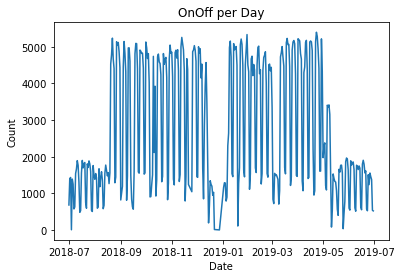

In [8]:
dates = list(niners_by_count['Date'])
counts = list(niners_by_count['Count'])
counts
plt.plot(dates, counts)
plt.title('OnOff per Day')
plt.ylabel('Count')
plt.xlabel('Date')
plt.show()

In [9]:
niners_by_time = niners_clean_df.groupby(['Time'])

In [10]:
niners_by_count1 = niners_by_time['Time'].count().reset_index(name='Count').sort_values(['Time'])
niners_by_count1['Time'] = niners_by_count1['Time'].astype(str)
niners_by_count1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81 entries, 0 to 80
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Time    81 non-null     object
 1   Count   81 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.9+ KB


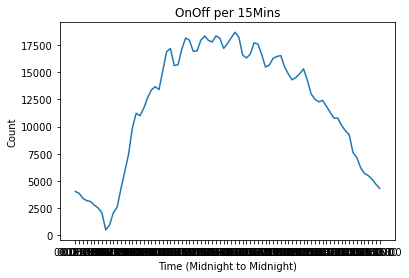

In [11]:
times = list(niners_by_count1['Time'])
counts1 = list(niners_by_count1['Count'])
counts1
plt.plot(times, counts1)
plt.title('OnOff per 15Mins')
plt.ylabel('Count')
plt.xlabel('Time (Midnight to Midnight)')
plt.show()